In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv(r"homeLoanAproval_modificado.csv",sep=',')
test = pd.read_csv(r"homeLoanAproval_modificado.csv",sep=',')

In [ ]:
# Pasamos a numéricas las vbles categóricas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = le.fit_transform(train[col])
        test[col] = le.fit_transform(test[col])



In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'PropertyArea', 'LoanStatus'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'PropertyArea', 'LoanStatus'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
SelfEmployed          object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
LoanAmountTerm       float64
PropertyArea          object
LoanStatus            object
dtype: object

In [8]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (478, 12)


,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,PropertyArea,LoanStatus
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,Urban,Y


In [9]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (478, 12)


,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,PropertyArea,LoanStatus
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,Urban,Y


In [10]:
train["LoanStatus"].count()

478

In [11]:
train["LoanStatus"].value_counts()

LoanStatus
Y    336
N    142
Name: count, dtype: int64

In [12]:
train["LoanStatus"].value_counts(normalize=True)*100

LoanStatus
Y    70.292887
N    29.707113
Name: proportion, dtype: float64

<Axes: title={'center': 'LoanStatus'}, xlabel='LoanStatus'>

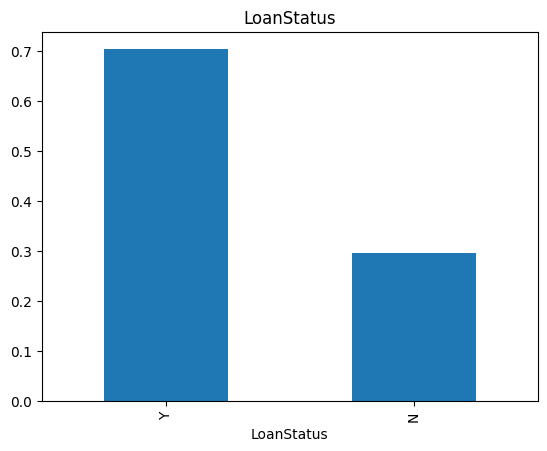

In [13]:
train["LoanStatus"].value_counts(normalize=True).plot.bar(title = 'LoanStatus')

In [15]:
train["Gender"].count()
train["Gender"].value_counts()
train['Gender'].value_counts(normalize=True)*100

Gender
Male      80.125523
Female    19.874477
Name: proportion, dtype: float64

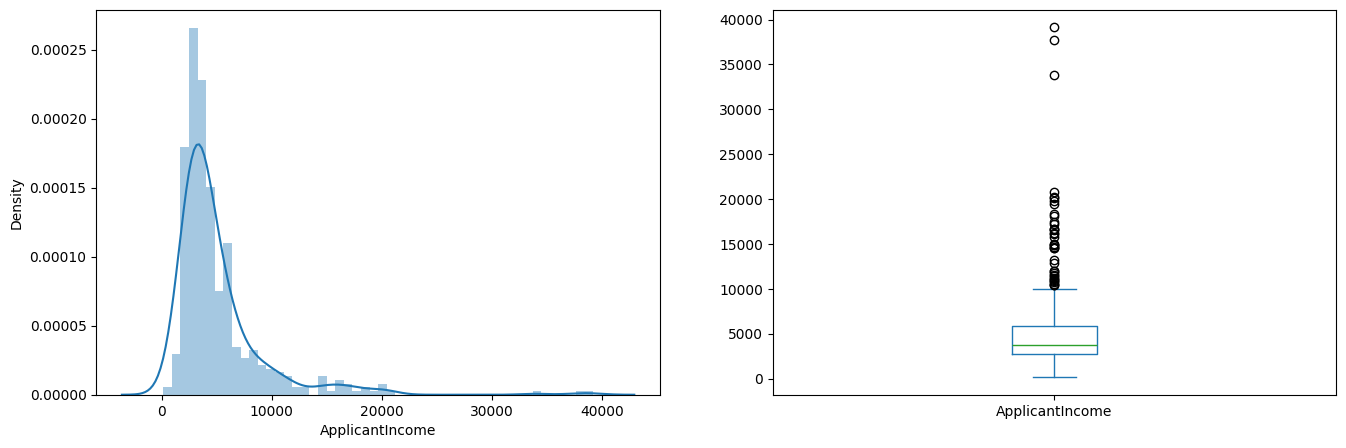

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

https://www.kaggle.com/code/sazid28/home-loan-prediction

LoanStatus    N    Y
Gender              
Female       32   63
Male        110  273


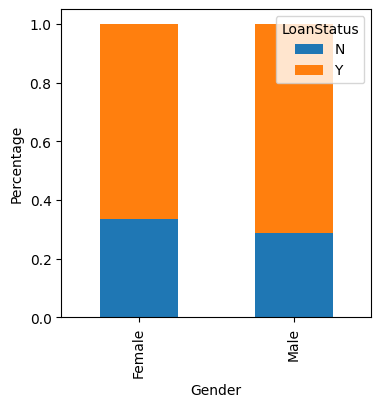

In [19]:
print(pd.crosstab(train["Gender"],train["LoanStatus"]))
Gender = pd.crosstab(train["Gender"],train["LoanStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

In [22]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['LoanStatus'].replace('N', 0,inplace=True)
train['LoanStatus'].replace('Y', 1,inplace=True)

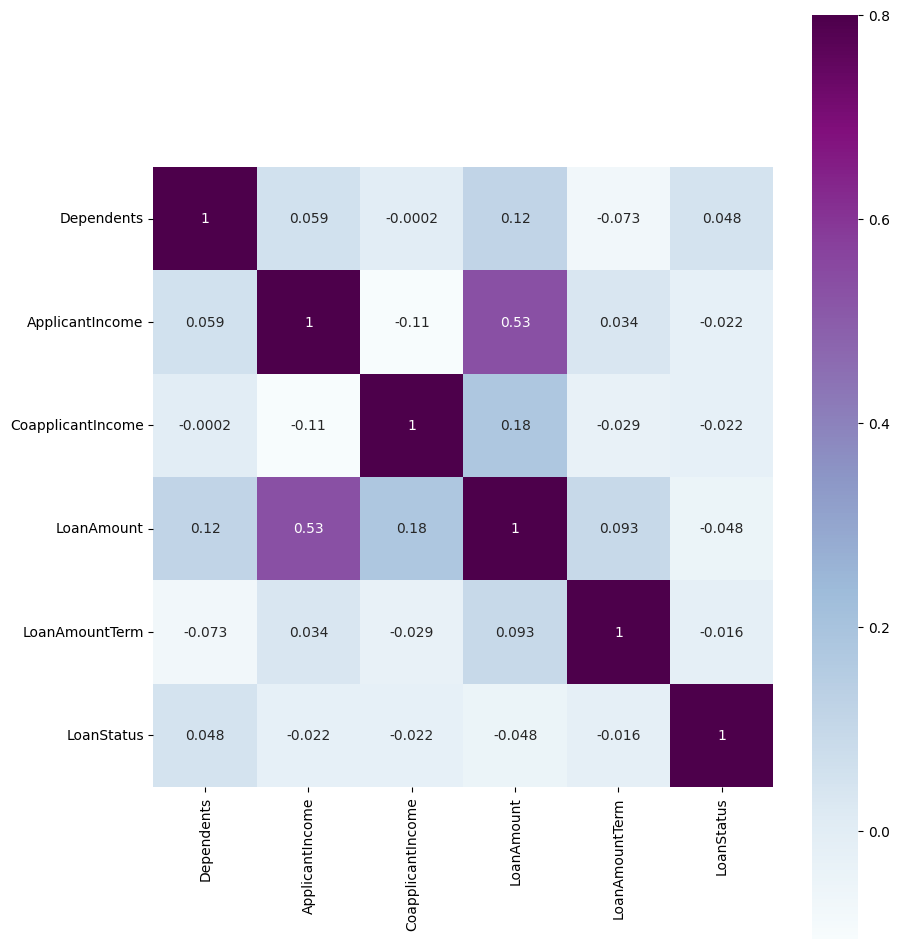

In [28]:
# selecciona solo las columnas numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = train.select_dtypes(include=numerics)

# ahora puedes calcular la correlación
matrix = newdf.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True)

In [29]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
PropertyArea         0
LoanStatus           0
dtype: int64

In [30]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [31]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]